# University Characteristics

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re

In [2]:
universities = pd.read_csv('Data\hd2017.csv', encoding='latin-1')
universities.head()

,UNITID,INSTNM,IALIAS,ADDR,CITY,STABBR,ZIP,FIPS,OBEREG,CHFNM,...,CBSATYPE,CSA,NECTA,COUNTYCD,COUNTYNM,CNGDSTCD,LONGITUD,LATITUDE,DFRCGID,DFRCUSCG
0,100654,Alabama A & M University,AAMU,4900 Meridian Street,Normal,AL,35762,1,5,"Dr. Andrew Hugine, Jr.",...,1,290,-2,1089,Madison County,105,-86.568502,34.783368,122,1
1,100663,University of Alabama at Birmingham,,Administration Bldg Suite 1070,Birmingham,AL,35294-0110,1,5,Ray L. Watts,...,1,142,-2,1073,Jefferson County,107,-86.799345,33.505697,109,1
2,100690,Amridge University,Southern Christian University |Regions University,1200 Taylor Rd,Montgomery,AL,36117-3553,1,5,Michael C.Turner,...,1,-2,-2,1101,Montgomery County,102,-86.174010,32.362609,141,2
3,100706,University of Alabama in Huntsville,UAH |University of Alabama Huntsville,301 Sparkman Dr,Huntsville,AL,35899,1,5,Robert A. Altenkirch,...,1,290,-2,1089,Madison County,105,-86.640449,34.724557,112,2
4,100724,Alabama State University,,915 S Jackson Street,Montgomery,AL,36104-0271,1,5,Quinton T. Ross,...,1,-2,-2,1101,Montgomery County,107,-86.295677,32.364317,131,1


In [4]:
pd.merge?

# Enrollment Info

In [3]:
# read data
enrollment = pd.read_csv('Data\effy2017.csv')
enrollment.head()
# filter only enrollment data for 4-year degrees
enrollment_4yr = enrollment[enrollment.EFFYLEV == 2] # 6478 rows * 33 columns
enrollment_4yr.head()
# over 50% universities don't have an international enrollment, so remove
# further filter only collges who have a non-zero international student enrollment
enrollment_4yr_intl = enrollment_4yr[enrollment_4yr.EFYNRALT > 0] # 3221 rows * 33 columns
enrollment_4yr_intl.head()
enrollment_4yr_intl.describe()

,UNITID,EFFYLEV,LSTUDY,EFYTOTLT,EFYTOTLM,EFYTOTLW,EFYAIANT,EFYAIANM,EFYAIANW,EFYASIAT,...,EFYWHITW,EFY2MORT,EFY2MORM,EFY2MORW,EFYUNKNT,EFYUNKNM,EFYUNKNW,EFYNRALT,EFYNRALM,EFYNRALW
count,3221.000000,3221.0,3221.0,3221.000000,3221.000000,3221.000000,3221.000000,3221.000000,3221.000000,3221.000000,...,3221.000000,3221.000000,3221.000000,3221.000000,3221.000000,3221.000000,3221.000000,3221.000000,3221.000000,3221.000000
mean,227736.488358,2.0,1.0,6547.051226,2902.170133,3644.881093,44.718721,18.386836,26.331885,401.805961,...,1790.809066,222.527786,95.689227,126.838559,313.883266,146.268550,167.614716,218.764980,118.292145,100.472835
std,111656.765403,0.0,0.0,10498.774682,4767.093794,5878.733741,147.702747,57.092036,92.070585,1109.591398,...,2892.822203,410.933411,181.846237,233.690630,1251.994461,516.980084,761.318667,590.984557,321.255723,280.431056
min,100654.000000,2.0,1.0,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,154527.000000,2.0,1.0,871.000000,332.000000,467.000000,2.000000,1.000000,1.000000,12.000000,...,168.000000,15.000000,4.000000,8.000000,14.000000,5.000000,7.000000,7.000000,3.000000,3.000000
50%,196167.000000,2.0,1.0,2594.000000,1083.000000,1519.000000,11.000000,4.000000,6.000000,52.000000,...,803.000000,64.000000,26.000000,37.000000,82.000000,35.000000,45.000000,40.000000,20.000000,18.000000
75%,232681.000000,2.0,1.0,7881.000000,3307.000000,4504.000000,36.000000,16.000000,20.000000,236.000000,...,2242.000000,232.000000,98.000000,135.000000,276.000000,125.000000,146.000000,163.000000,85.000000,71.000000
max,491303.000000,2.0,1.0,164851.000000,74086.000000,100335.000000,3435.000000,1363.000000,2072.000000,12141.000000,...,61062.000000,5440.000000,2400.000000,3040.000000,54054.000000,19487.000000,34567.000000,11862.000000,6334.000000,5528.000000


In [18]:
# EDA
# enrollment_4yr['UNITID'].value_counts() # all unique!
plt.hist?

In [5]:
# international student enrollment percentage
intl_pct = data['EFYNRALT']/data['EFYTOTLT'] * 100
intl_pct.head()
#intl_pct.describe() 

0    0.729787
1    2.735197
2    2.886022
3    1.510805
4    2.891228
dtype: float64

Text(0.5, 1.0, '2017 International Student Enrollment Percentage')

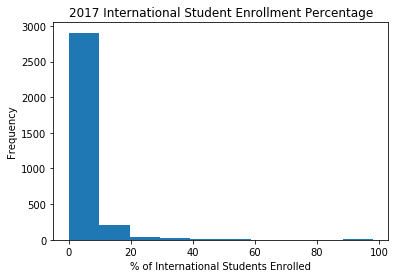

In [11]:
# histogram 
n, bins, patches = plt.hist(x=intl_pct)
plt.xlabel('% of International Students Enrolled')
plt.ylabel('Frequency')
plt.title('2017 International Student Enrollment Percentage')
# Set a clean upper y-axis limit.
#plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

In [6]:
# diversity index

prop_AIAN = data['EFYAIANT']/data['EFYTOTLT']
prop_ASIA = data['EFYASIAT']/data['EFYTOTLT']
prop_BKAA = data['EFYBKAAT']/data['EFYTOTLT']
prop_HISP = data['EFYHISPT']/data['EFYTOTLT']
prop_WHIT = data['EFYWHITT']/data['EFYTOTLT'] 
prop_NHPI = data['EFYNHPIT']/data['EFYTOTLT']
prop_2MOR = data['EFY2MORT']/data['EFYTOTLT']

diversity_index = 1 - (np.square(prop_AIAN) + np.square(prop_ASIA) + np.square(prop_BKAA) + np.square(prop_HISP) +
                      np.square(prop_WHIT) + np.square(prop_NHPI) + np.square(prop_2MOR))
diversity_index.head()


0    0.168251
1    0.606364
2    0.532520
3    0.133128
4    0.394760
dtype: float64

Text(0.5, 1.0, '2017 Diversity Index')

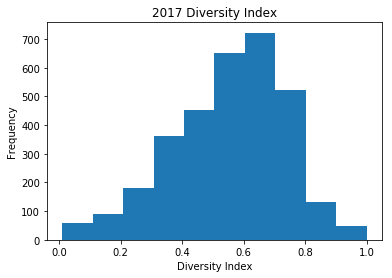

In [36]:
# histogram of diversity index
n, bins, patches = plt.hist(x=diversity_index)
plt.xlabel('Diversity Index')
plt.ylabel('Frequency')
plt.title('2017 Diversity Index')

Text(0.5, 1.0, '2017 International Enrollment vs. Diversity Index')

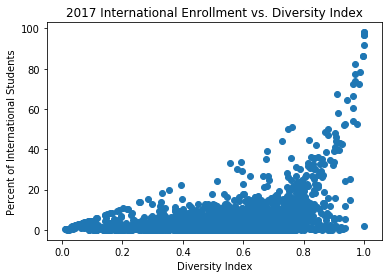

In [39]:
# scatter plot
plt.scatter?
plt.scatter(diversity_index, intl_pct)
plt.xlabel('Diversity Index')
plt.ylabel('Percent of International Students')
plt.title('2017 International Enrollment vs. Diversity Index')

# Merged Data

In [4]:
# merge university characteristics and enrollment data
data = pd.merge(enrollment_4yr_intl, universities, how = 'left', on = 'UNITID')
data.head()

,UNITID,EFFYLEV,LSTUDY,XEYTOTLT,EFYTOTLT,XEYTOTLM,EFYTOTLM,XEYTOTLW,EFYTOTLW,XEFYAIAT,...,CBSATYPE,CSA,NECTA,COUNTYCD,COUNTYNM,CNGDSTCD,LONGITUD,LATITUDE,DFRCGID,DFRCUSCG
0,100654,2,1,R,5207,R,2286,R,2921,R,...,1,290,-2,1089,Madison County,105,-86.568502,34.783368,122,1
1,100663,2,1,R,13308,R,5528,R,7780,R,...,1,142,-2,1073,Jefferson County,107,-86.799345,33.505697,109,1
2,100706,2,1,R,7519,R,4287,R,3232,R,...,1,290,-2,1089,Madison County,105,-86.640449,34.724557,112,2
3,100724,2,1,R,5229,R,2024,R,3205,R,...,1,-2,-2,1101,Montgomery County,107,-86.295677,32.364317,131,1
4,100751,2,1,R,35625,R,15883,R,19742,R,...,1,-2,-2,1125,Tuscaloosa County,107,-87.545978,33.211875,111,1


In [7]:
print(len(intl_pct))
print(len(diversity_index))
print(data.shape)
#  add international percentage and diversity index to data
data_tmp = pd.concat([data, pd.DataFrame(intl_pct, columns=['intl_pct']), 
                      pd.DataFrame(diversity_index, columns = ['diverse_ind'])], axis = 1)
data_tmp.head()


3221
3221
(3221, 134)


,UNITID,EFFYLEV,LSTUDY,XEYTOTLT,EFYTOTLT,XEYTOTLM,EFYTOTLM,XEYTOTLW,EFYTOTLW,XEFYAIAT,...,NECTA,COUNTYCD,COUNTYNM,CNGDSTCD,LONGITUD,LATITUDE,DFRCGID,DFRCUSCG,intl_pct,diverse_ind
0,100654,2,1,R,5207,R,2286,R,2921,R,...,-2,1089,Madison County,105,-86.568502,34.783368,122,1,0.729787,0.168251
1,100663,2,1,R,13308,R,5528,R,7780,R,...,-2,1073,Jefferson County,107,-86.799345,33.505697,109,1,2.735197,0.606364
2,100706,2,1,R,7519,R,4287,R,3232,R,...,-2,1089,Madison County,105,-86.640449,34.724557,112,2,2.886022,0.532520
3,100724,2,1,R,5229,R,2024,R,3205,R,...,-2,1101,Montgomery County,107,-86.295677,32.364317,131,1,1.510805,0.133128
4,100751,2,1,R,35625,R,15883,R,19742,R,...,-2,1125,Tuscaloosa County,107,-87.545978,33.211875,111,1,2.891228,0.394760


In [9]:
# if works well, replace data with data_tmp
data = data_tmp
data.to_csv('Data/Data Merged.csv', index = False)

In [12]:
data.diverse_ind[data.INSTNM == 'Temple University'] # Bucknell University 0.42971

2083    0.668784
Name: diverse_ind, dtype: float64

# Load US News ranking

In [162]:
# institution name
names = []
with open('Data/US News 2020.txt', 'r') as file:
    for line in file:
        name = line[:-1]
        # replace--  with - in the name 
        name = re.sub('--','-', name)
        names.append(name)
print(names)
# institution ranking
rankings = []
with open('Data/US News 2020 rankings.txt', 'r') as file:
    for line in file:
        rankings.append(line[:-1])
print(rankings)
# tuition
tuitions = []
with open('Data/US News 2020 tuitions.txt', 'r') as file:
    for line in file:
        tuitions.append(line[:-1])
print(tuitions)

['Princeton University', 'Harvard University', 'Columbia University', 'Massachusetts Institute of Technology', 'Yale University', 'Stanford University', 'University of Chicago', 'University of Pennsylvania', 'Northwestern University', 'Duke University', 'Johns Hopkins University', 'California Institute of Technology', 'Dartmouth College', 'Brown University', 'University of Notre Dame', 'Vanderbilt University', 'Cornell University', 'Rice University', 'Washington University in St. Louis', 'University of California-Los Angeles', 'Emory University', 'University of California-Berkeley', 'University of Southern California', 'Georgetown University', 'Carnegie Mellon University', 'University of Michigan-Ann Arbor', 'Wake Forest University', 'University of Virginia', 'Georgia Institute of Technology', 'New York University', 'Tufts University', 'University of North Carolina-Chapel Hill', 'University of Rochester', 'University of California-Santa Barbara', 'University of Florida', 'University of

In [112]:
# cleaning
# convert ranking to numeric
rankings_clean = []
for i in range(292):
    rankings_clean.append(rankings[i][1:])
for i in range(292, len(rankings)):
    rankings_clean.append('293')
rankings_clean = [int(ranking) for ranking in rankings_clean]
print(len(rankings_clean))
#print(rankings_clean)

381


In [111]:
# convert tuition to numeric
tuitions_clean = [re.sub('\(out-of-state\)','', t) for t in tuitions]
tuitions_clean = [re.sub(',','', t) for t in tuitions_clean]
for i in range(len(tuitions)):
    if tuitions_clean[i] == 'N/A':
        tuitions_clean[i] = np.nan
    else:
        tuitions_clean[i] = int(tuitions_clean[i][1:])
#print(tuitions_clean)

In [110]:
# split column of aliases in preparation for searching
aliases = []
for al in data.IALIAS:
    als = re.split('\|', al)
    if len(als) == 1: # if not split by |
        als = re.split(',', als[0])
    if len(als) == 1: 
        als = re.split(';', als[0])
    if len(als) == 1:
        als = re.split('/', als[0])
    # remove white spaces at beginning and end
    als_no_space = [al.strip() for al in als]
    aliases.append(als_no_space)
#print(aliases)
    

In [68]:
# merge with data again

# for each university in the US News list, find a match from the names/aliases
# this is a pain by the way
match = [0] * len(names)
official_names = []
for i in range(len(names)):
    off_name = ''
    if names[i] in list(data.INSTNM): # found a match
        off_name = names[i]
        match[i] = 1
    elif ('The '+ names[i]) in list(data.INSTNM): # "The University of ...."
        off_name = ('The '+ names[i])
        match[i] = 1
    else:
        for j in range(len(data.INSTNM)):
            if names[i] in aliases[j]:
                off_name = data.INSTNM[j]
                match[i] = 1
                break
    official_names.append(off_name)

#print(official_names)
print(sum(match))

300


In [92]:
# second round of matching
# for both lists, remove: at, -, 'Main Campus'
instnm_2 = [re.sub(' at ', ' ', name) for name in data.INSTNM]
instnm_2 = [re.sub('-', ' ', name) for name in instnm_2]
instnm_2 = [re.sub('Main Campus', '', name) for name in instnm_2]
instnm_2 = [re.sub('\.', '', name) for name in instnm_2]
instnm_2 = [name.strip() for name in instnm_2]
#print(instnm_2)

names_2 = [re.sub('-',' ', name) for name in names]
names_2 = [re.sub('\.','', name) for name in names_2]
#print(names_2)

# round 2
for i in range(len(names_2)):
    if match[i] == 0:
        if names_2[i] in instnm_2:
            match[i] = 1
            official_names[i] = data.INSTNM[np.where(np.array(instnm_2) == names_2[i])[0][0]]
        elif ('The '+names_2[i]) in instnm_2:
            match[i] = 1
            official_names[i] = data.INSTNM[np.where(np.array(instnm_2) == ('The '+names_2[i]))[0][0]]
            
print(sum(match))
#print(official_names)



343


In [109]:
# third round, manual matching
manual = pd.read_csv('Data/manual matching.csv')
#print(manual.head())

for i in range(len(manual.names_3)):
    ind = np.where(np.array(names_2) == manual.names_3[i])[0][0]
    official_names[ind] = manual.instnm_3[i]
    if manual.instnm_3[i] != '':
        match[ind] =1
#print(official_names)
print(sum(match))
# found match for 379 universities. did not find match for 2 universities

381


# US News best schools for international students

In [128]:
# add US News best collges/universities for international students
US_news_best = pd.read_csv('Data/US news best colleges for international students.csv')
US_news_best.head()

,NATIONAL UNIVERSITY,2019 BEST COLLEGES RANK
0,Adelphi University (NY),147 (tie)
1,American University (DC),78 (tie)
2,Andrews University (MI),194 (tie)
3,Arizona State University-Tempe,115 (tie)
4,Baylor University (TX),78 (tie)


In [184]:
# cleaning
bests = [re.sub('\s\(\w+\)','', institution) for institution in list(US_news_best['NATIONAL UNIVERSITY'])]
bests = ['Missouri University of Science & Technology-Rolla' 
         if inst == 'Missouri University of Science & Technology' 
         else inst for inst in bests]
#print(bests)
rank_2019 = [int(r.strip(' \(tie\)')) for r in list(US_news_best['2019 BEST COLLEGES RANK'])]
#print(rank_2019)
# here's a bug. Their list came from top 229 schools from the 2019 ranking. 
# but I only have the ranking for 2020. I'll fix this later if I can
# create a variable, 1 for on the list, 0 for not, for the 229 schools
good_yn = [np.NaN]*len(names)
for i in range(len(names)):
    if rankings_clean[i] < 293:
        if names[i] in bests:
            good_yn[i] = 1
        else:
            good_yn[i] = 0
print(np.nansum(good_yn))
print(np.nansum(np.subtract(1, good_yn)))
# 292 schools, 172 1's, 120 0's

172.0
120.0


In [185]:
# concatenate
US_news = pd.DataFrame(list(zip(official_names, names, rankings_clean, tuitions_clean, good_yn)), 
               columns =['Name_match','Name_US_news', 'ranking_US_news', 'tuition_US_news', 'good_for_intl_US_news'])
US_news.head()
US_news.to_csv('Data/US News cleaned.csv', index = False)

In [116]:
# merge again
data_tmp = pd.merge(data, US_news, how = 'left', left_on = 'INSTNM', right_on = 'Name_match')
data_tmp.to_csv('Data/Data_tmp.csv', index = False)
data_tmp.head()

,UNITID,EFFYLEV,LSTUDY,XEYTOTLT,EFYTOTLT,XEYTOTLM,EFYTOTLM,XEYTOTLW,EFYTOTLW,XEFYAIAT,...,LONGITUD,LATITUDE,DFRCGID,DFRCUSCG,intl_pct,diverse_ind,Name_match,Name_US_news,ranking_US_news,tuition_US_news
0,100654,2,1,R,5207,R,2286,R,2921,R,...,-86.568502,34.783368,122,1,0.729787,0.168251,NaN,NaN,NaN,NaN
1,100663,2,1,R,13308,R,5528,R,7780,R,...,-86.799345,33.505697,109,1,2.735197,0.606364,University of Alabama at Birmingham,University of Alabama-Birmingham,166.0,25380.0
2,100706,2,1,R,7519,R,4287,R,3232,R,...,-86.640449,34.724557,112,2,2.886022,0.532520,University of Alabama in Huntsville,University of Alabama-Huntsville,263.0,23110.0
3,100724,2,1,R,5229,R,2024,R,3205,R,...,-86.295677,32.364317,131,1,1.510805,0.133128,NaN,NaN,NaN,NaN
4,100751,2,1,R,35625,R,15883,R,19742,R,...,-87.545978,33.211875,111,1,2.891228,0.394760,The University of Alabama,University of Alabama,153.0,30250.0


In [193]:
data = data_tmp
data.to_csv('Data/Data Merged.csv', index = False)

# Quick model

In [2]:
# read data
data = pd.read_csv('Data/Data Merged.csv')
data.head()

,UNITID,EFFYLEV,LSTUDY,XEYTOTLT,EFYTOTLT,XEYTOTLM,EFYTOTLM,XEYTOTLW,EFYTOTLW,XEFYAIAT,...,NECTA,COUNTYCD,COUNTYNM,CNGDSTCD,LONGITUD,LATITUDE,DFRCGID,DFRCUSCG,intl_pct,diverse_ind
0,100654,2,1,R,5207,R,2286,R,2921,R,...,-2,1089,Madison County,105,-86.568502,34.783368,122,1,0.729787,0.168251
1,100663,2,1,R,13308,R,5528,R,7780,R,...,-2,1073,Jefferson County,107,-86.799345,33.505697,109,1,2.735197,0.606364
2,100706,2,1,R,7519,R,4287,R,3232,R,...,-2,1089,Madison County,105,-86.640449,34.724557,112,2,2.886022,0.532520
3,100724,2,1,R,5229,R,2024,R,3205,R,...,-2,1101,Montgomery County,107,-86.295677,32.364317,131,1,1.510805,0.133128
4,100751,2,1,R,35625,R,15883,R,19742,R,...,-2,1125,Tuscaloosa County,107,-87.545978,33.211875,111,1,2.891228,0.394760


In [206]:
# creating training and holdout set
from sklearn.model_selection import train_test_split
data_291_national_universities = data.dropna()
data_291_national_universities.shape
np.random.seed(922)
train, test = train_test_split(data_291_national_universities, test_size = 0.3)

In [209]:
# MVP, good_for_intl ~ diversity index + intl_pct
from sklearn.linear_model import LogisticRegression
logit_model = LogisticRegression(penalty='l2')
logit_model.fit(X = train[['intl_pct','diverse_ind']], y = train['good_for_intl_US_news'])
logit_fit = logit_model.predict(test[['intl_pct','diverse_ind']])

C:\Users\Ning\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [214]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score,classification_report
logit_mat = confusion_matrix(y_true = test['good_for_intl_US_news'], y_pred = logit_fit)
print(logit_mat)
print("training accuracy:\n", logit_model.score(train[['intl_pct','diverse_ind']], train['good_for_intl_US_news']))
print("testing accuracy:\n", logit_model.score(test[['intl_pct','diverse_ind']], test['good_for_intl_US_news']))

[[15 23]
 [ 5 45]]
training accuracy:
 0.6995073891625616
testing accuracy:
 0.6818181818181818


In [196]:
# cross validation
kfold = KFold(n_splits=3, random_state=7)
result = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')